<a href="https://colab.research.google.com/github/fatbardhfeta/Comind_TeachersTool/blob/master/ML_Project_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting Google Drive, only needed once
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Uploading the arrays into local variables, only needed once
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/ML PROJECT/genresV1.csv')
genres = df.to_numpy()   #to convert pandas dataframe to 2d numpy array
df = pd.read_csv('/content/drive/My Drive/ML PROJECT/features.csv',header=None )
features = df.to_numpy()   #to convert pandas dataframe to 2d numpy array

#fixing issue with geners data format
temp = []

for i in range(np.size(genres,0)):
  temp.append(genres[i][0])
temp = np.asarray(temp)

genres2 = []
features2= []

c = 0
for i in temp:
  if( i != '[]' and i != 'nan' and i != 'Jarrod Fowler' and i != ' John Butcher' and (i[0:5] != "['zal") ):
    genres2.append(getgenres(i))
    features2.append( features[c])
  c +=1

genres2 = np.asarray(genres2)
features2 = np.asarray(features2)

df = pd.read_csv('/content/drive/My Drive/ML PROJECT/genres.csv')
genrelist = df.to_numpy()   #to convert pandas dataframe to 2d numpy array
temp1 = np.transpose(genrelist)[0]#all genres
temp2 = np.transpose(genrelist)[4] #parent genres, if 0 -> it is already a parent
genrelist = np.transpose(np.vstack((temp1,temp2))) #we only need these 2 at this point



In [0]:
genresSingle = []
featuresSingle = [] 
for (i,j) in zip(genres2,features2):
  for k in i:
    genresSingle.append(k)
    featuresSingle.append(j)
genresSingle = np.asarray(genresSingle)
featuresSingle = np.asarray(featuresSingle)

In [0]:
# WE ARE CURRENTLY USING THIS ONE
genresSingleTop = []
featuresSingleTop = [] 
for (i,j) in zip(genres2,features2):
  for k in i:
    t = temp2[np.where(temp1 == k)]
    genresSingleTop.append(t[0])
    featuresSingleTop.append(j)
genresSingleTop = np.asarray(genresSingleTop)
featuresSingleTop = np.asarray(featuresSingleTop)

In [0]:
genresSingleTop2 = []
featuresSingleTop2 = [] 
for (i,j) in zip(genres2,features2):
  xyt = []
  for k in i:
    t = temp2[np.where(temp1 == k)]
    if t[0] not in xyt:
      xyt.append(t[0])

      genresSingleTop2.append(t[0])
      featuresSingleTop2.append(j)
genresSingleTop2 = np.asarray(genresSingleTop2)
featuresSingleTop2 = np.asarray(featuresSingleTop2)

In [0]:
xy = genres2[-3]
xyt = []
print(xy)
for j in xy:
  xyz = np.where(temp1 == j)
  print(xyz)
  xyt.append(temp2[xyz[0][0]])
print (type(xyt))
print(max(set(xyt), key = xyt.count))

[12 32 66]
(array([11]),)
(array([27]),)
(array([44]),)
<class 'list'>
12


In [0]:
#fatbardh
from operator import itemgetter

countGenres = np.zeros(1236)
for i in range(81553):
  for j in genres2[i]:
    countGenres[j] += 1

graphData = []
for i in range(1236):
  if(countGenres[i] != 0.0):
    graphData.append( [i , int(countGenres[i])])

a = sorted(graphData, key=lambda x: x[1], reverse=True)
print(len( graphData))
for i in range(15):
  print(a[i])

In [0]:
print(genres2)

In [0]:
genresSingleTop = []
featuresSingleTop = [] 
for (i,j) in zip(genres2,features2):
    t = temp2[np.where(temp1 == i)]
  for k in i:
    genresSingleTop.append(t[0])
    featuresSingleTop.append(j)
genresSingleTop = np.asarray(genresSingleTop)
featuresSingleTop = np.asarray(featuresSingleTop)

In [0]:
#Checking sizes: It should be 106574-1,106574-1,106574-518,163-2
print("Geners.shape")
print( genres2.shape)
print("Features List shape.")
print(features2.shape)
print("GenreList Shape")
print( genrelist.shape)


print("Feature Matrix Shape:")
print(featuresSingleTop.shape)
print("Genres Vector Shape:")
print(genresSingleTop.shape)

Geners.shape
(81553,)
Features List shape.
(81553, 518)
GenreList Shape
(163, 2)
Feature Matrix Shape:
(191292, 518)
Genres Vector Shape:
(191292,)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import keras

import warnings
warnings.filterwarnings('ignore')


from keras import models
from keras import layers

#from sklearn.decomposition import PCA

featuresTrial = featuresSingleTop#[0:1000]
genresTrial = genresSingleTop#[0:1000]

encoder = LabelEncoder()
y = encoder.fit_transform(genresTrial)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(featuresTrial, dtype = float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#pca = PCA(.95)

#pca.fit(X_train)

#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(16, activation='softmax'))

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=1024)
                    

Epoch 1/150
153033/153033 [==============================] - 6s 37us/step - loss: 2.1302 - acc: 0.2531
Epoch 2/150
153033/153033 [==============================] - 2s 13us/step - loss: 2.0762 - acc: 0.2676
Epoch 3/150
153033/153033 [==============================] - 2s 13us/step - loss: 2.0505 - acc: 0.2819
Epoch 4/150
153033/153033 [==============================] - 2s 13us/step - loss: 2.0207 - acc: 0.2991
Epoch 5/150
153033/153033 [==============================] - 2s 13us/step - loss: 1.9807 - acc: 0.3193
Epoch 6/150
153033/153033 [==============================] - 2s 13us/step - loss: 1.9339 - acc: 0.3411
Epoch 7/150
153033/153033 [==============================] - 2s 13us/step - loss: 1.8808 - acc: 0.3630
Epoch 8/150
153033/153033 [==============================] - 2s 13us/step - loss: 1.8230 - acc: 0.3841
Epoch 9/150
153033/153033 [==============================] - 2s 13us/step - loss: 1.7662 - acc: 0.4045
Epoch 10/150
153033/153033 [==============================] - 2s 13us/ste

In [0]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

38259/38259 [==============================] - 5s 121us/step
test_acc:  0.37227841814374607


Text(0.5, 1.0, 'Training Loss vs epoch #')

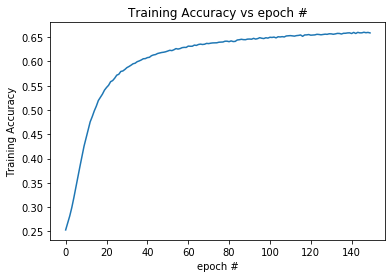

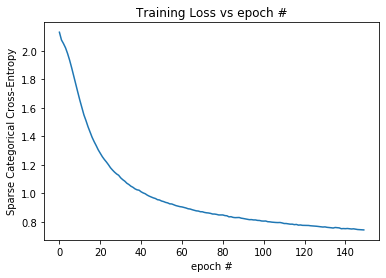

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.xlabel('epoch #')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs epoch #')
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('epoch #')
plt.ylabel('Sparse Categorical Cross-Entropy')
plt.title('Training Loss vs epoch #')

In [0]:
def getgenres(temp):
    temp = temp.replace("[","")
    temp = temp.replace(",","")
    temp = temp.replace("]","")
    lis = list(map(int,temp.split(" ")))
    arr = np.asarray(lis)
    return arr